In [25]:
import pandas as pd

from geocoder import Geocoder
from semantic_model import Semantic_model, Visualiztor

In [5]:
df = pd.read_csv('I:\\sloyka\\data\\raw\\posts_spb_today.csv', delimiter=';').dropna(subset='text')
df

,Unnamed: 0,date,text,id,link
0,0,2023-11-21 14:47:17,В Санкт-Петербурге продолжается расследование ...,18541310,NaN
1,1,2023-11-21 14:05:01,Водитель Порше обиделсяПредыстория:После перес...,18541140,NaN
2,2,2023-11-21 14:03:04,Мерседес сбил доставщика на электропеде на пер...,18541135,NaN
3,3,2023-11-21 14:00:04,"На КАД'е в аэродрома Левашово, произошло жёстк...",18541124,NaN
4,4,2023-11-21 13:00:01,"— Данный пост будет интересен тем, у кого в кв...",18541019,NaN
...,...,...,...,...,...
8387,95,2022-11-17 19:39:37,На территории больницы им. Мечникова со сторон...,17361930,NaN
8388,96,2022-11-17 19:34:22,Солярис залетел под Ниссан на улице Морской Пе...,17361909,NaN
8389,97,2022-11-17 18:19:32,ДТП на пересечении Лесного проспекта и 1-го Му...,17361722,NaN
8390,98,2022-11-17 16:59:08,👨‍🚒 На станции «Комендантский проспект» в ночь...,17361522,NaN


In [6]:
g = Geocoder()
names_df = g.run(df, text_column='text')
names_df

2024-01-29 16:03:06,325 SequenceTagger predicts: Dictionary with 5 tags: O, S-ADDRESS, B-ADDRESS, E-ADDRESS, I-ADDRESS


100%|██████████| 5624/5624 [14:08<00:00,  6.63it/s] 
i:\sloyka\factfinder\src\geocoder.py:588: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["geometry"] = df.Location.apply(
i:\sloyka\factfinder\src\geocoder.py:591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] = df.Location.apply(lambda x: x.address)


,index,Unnamed: 0,date,text,id,link,Street,Numbers,Score,location_options,Location,geometry,level
0,0,0,2023-11-21 14:47:17,В Санкт-Петербурге продолжается расследование ...,18541310,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.30576 59.92694),global
1,1,1,2023-11-21 14:05:01,Водитель Порше обиделсяПредыстория:После перес...,18541140,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.30576 59.92694),global
2,2,2,2023-11-21 14:03:04,Мерседес сбил доставщика на электропеде на пер...,18541135,NaN,кима,,NaN,['проспект КИМа Санкт-Петербург Россия'],"проспект КИМа, округ Остров Декабристов, Санкт...",POINT (30.24661 59.95114),street
3,3,3,2023-11-21 14:00:04,"На КАД'е в аэродрома Левашово, произошло жёстк...",18541124,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.30576 59.92694),global
4,4,4,2023-11-21 13:00:01,"— Данный пост будет интересен тем, у кого в кв...",18541019,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.30576 59.92694),global
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,8387,95,2022-11-17 19:39:37,На территории больницы им. Мечникова со сторон...,17361930,NaN,мечникова,,0.942,['проспект Мечникова Санкт-Петербург Россия'],"проспект Мечникова, станция Пискарёвка, Пискар...",POINT (30.41658 59.98456),street
9746,8388,96,2022-11-17 19:34:22,Солярис залетел под Ниссан на улице Морской Пе...,17361909,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.30576 59.92694),global
9747,8389,97,2022-11-17 18:19:32,ДТП на пересечении Лесного проспекта и 1-го Му...,17361722,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.30576 59.92694),global
9748,8390,98,2022-11-17 16:59:08,👨‍🚒 На станции «Комендантский проспект» в ночь...,17361522,NaN,комендантский,,0.997,['Комендантский проспект Санкт-Петербург Росс...,"Комендантский проспект, Озеро Долгое, округ Оз...",POINT (30.25648 60.01032),street


In [12]:
names_df['Location'].dropna().values[:20]

array(['проспект КИМа, округ Остров Декабристов, Санкт-Петербург, Северо-Западный федеральный округ, 199155, Россия',
       'улица Тамбасова, Сосновая Поляна, округ Сосновая поляна, Санкт-Петербург, Северо-Западный федеральный округ, 198329, Россия',
       'Приморский путепровод, Старая Деревня, округ № 65, Санкт-Петербург, Северо-Западный федеральный округ, 197374, Россия',
       'Приморское шоссе, Лахта, округ Лахта-Ольгино, Санкт-Петербург, Северо-Западный федеральный округ, 197229, Россия',
       'Приморский проспект, округ № 65, Санкт-Петербург, Северо-Западный федеральный округ, 198345, Россия',
       'Приморский переулок, Смолячково, Санкт-Петербург, Северо-Западный федеральный округ, 197729, Россия',
       'Улица Дыбенко, проспект Большевиков, округ Оккервиль, Санкт-Петербург, Северо-Западный федеральный округ, 193232, Россия',
       'мост Дыбенко, округ № 54, Санкт-Петербург, Северо-Западный федеральный округ, 193312, Россия',
       'Литейный проспект, Литейный округ, 

In [28]:
sm = Semantic_model(file_path='I:\\sloyka\\data\\raw\\posts_spb_today.csv', column='text')
model = sm.make_model()
model.wv.most_similar('Приморский проспект, округ № 65, Санкт-Петербург, Северо-Западный федеральный округ, 198345, Россия')

Parsing sentences from training set...


i:\sloyka\factfinder\src\semantic_model.py:43: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, "lxml").get_text()


2024-01-29 17:08:58,401 SequenceTagger predicts: Dictionary with 5 tags: O, S-ADDRESS, B-ADDRESS, E-ADDRESS, I-ADDRESS


100%|██████████| 5624/5624 [14:00<00:00,  6.69it/s]
i:\sloyka\factfinder\src\geocoder.py:588: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["geometry"] = df.Location.apply(
i:\sloyka\factfinder\src\geocoder.py:591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] = df.Location.apply(lambda x: x.address)


[('близ', 0.9925023913383484),
 ('завалить', 0.9902139902114868),
 ('го', 0.9898512363433838),
 ('девяткино', 0.9895881414413452),
 ('усть', 0.9894474744796753),
 ('станция', 0.9893536567687988),
 ('переулок', 0.9887698292732239),
 ('улица Тельмана, Народный округ, Санкт-Петербург, Северо-Западный федеральный округ, 192232, Россия',
  0.9885668754577637),
 ('улица Пушкина, Скачки, Красное Село, Санкт-Петербург, Северо-Западный федеральный округ, 198320, Россия',
  0.9874424934387207),
 ('пл', 0.9871060252189636)]

In [29]:
model.wv.most_similar('Приморский проспект, округ № 65, Санкт-Петербург, Северо-Западный федеральный округ, 198345, Россия')

[('близ', 0.9925023913383484),
 ('завалить', 0.9902139902114868),
 ('го', 0.9898512363433838),
 ('девяткино', 0.9895881414413452),
 ('усть', 0.9894474744796753),
 ('станция', 0.9893536567687988),
 ('переулок', 0.9887698292732239),
 ('улица Тельмана, Народный округ, Санкт-Петербург, Северо-Западный федеральный округ, 192232, Россия',
  0.9885668754577637),
 ('улица Пушкина, Скачки, Красное Село, Санкт-Петербург, Северо-Западный федеральный округ, 198320, Россия',
  0.9874424934387207),
 ('пл', 0.9871060252189636)]

In [31]:
sm.save_model(model=model, model_path='I:\\sloyka\\semantic_models\\model.model')

Model saved in I:\sloyka\semantic_models\model.model


In [32]:
v = Visualiztor('Приморский проспект, округ № 65, Санкт-Петербург, Северо-Западный федеральный округ, 198345, Россия', 'I:\\sloyka\\semantic_models\\model.model')

Image is saved in I:\sloyka\data\graph_1.jpg.


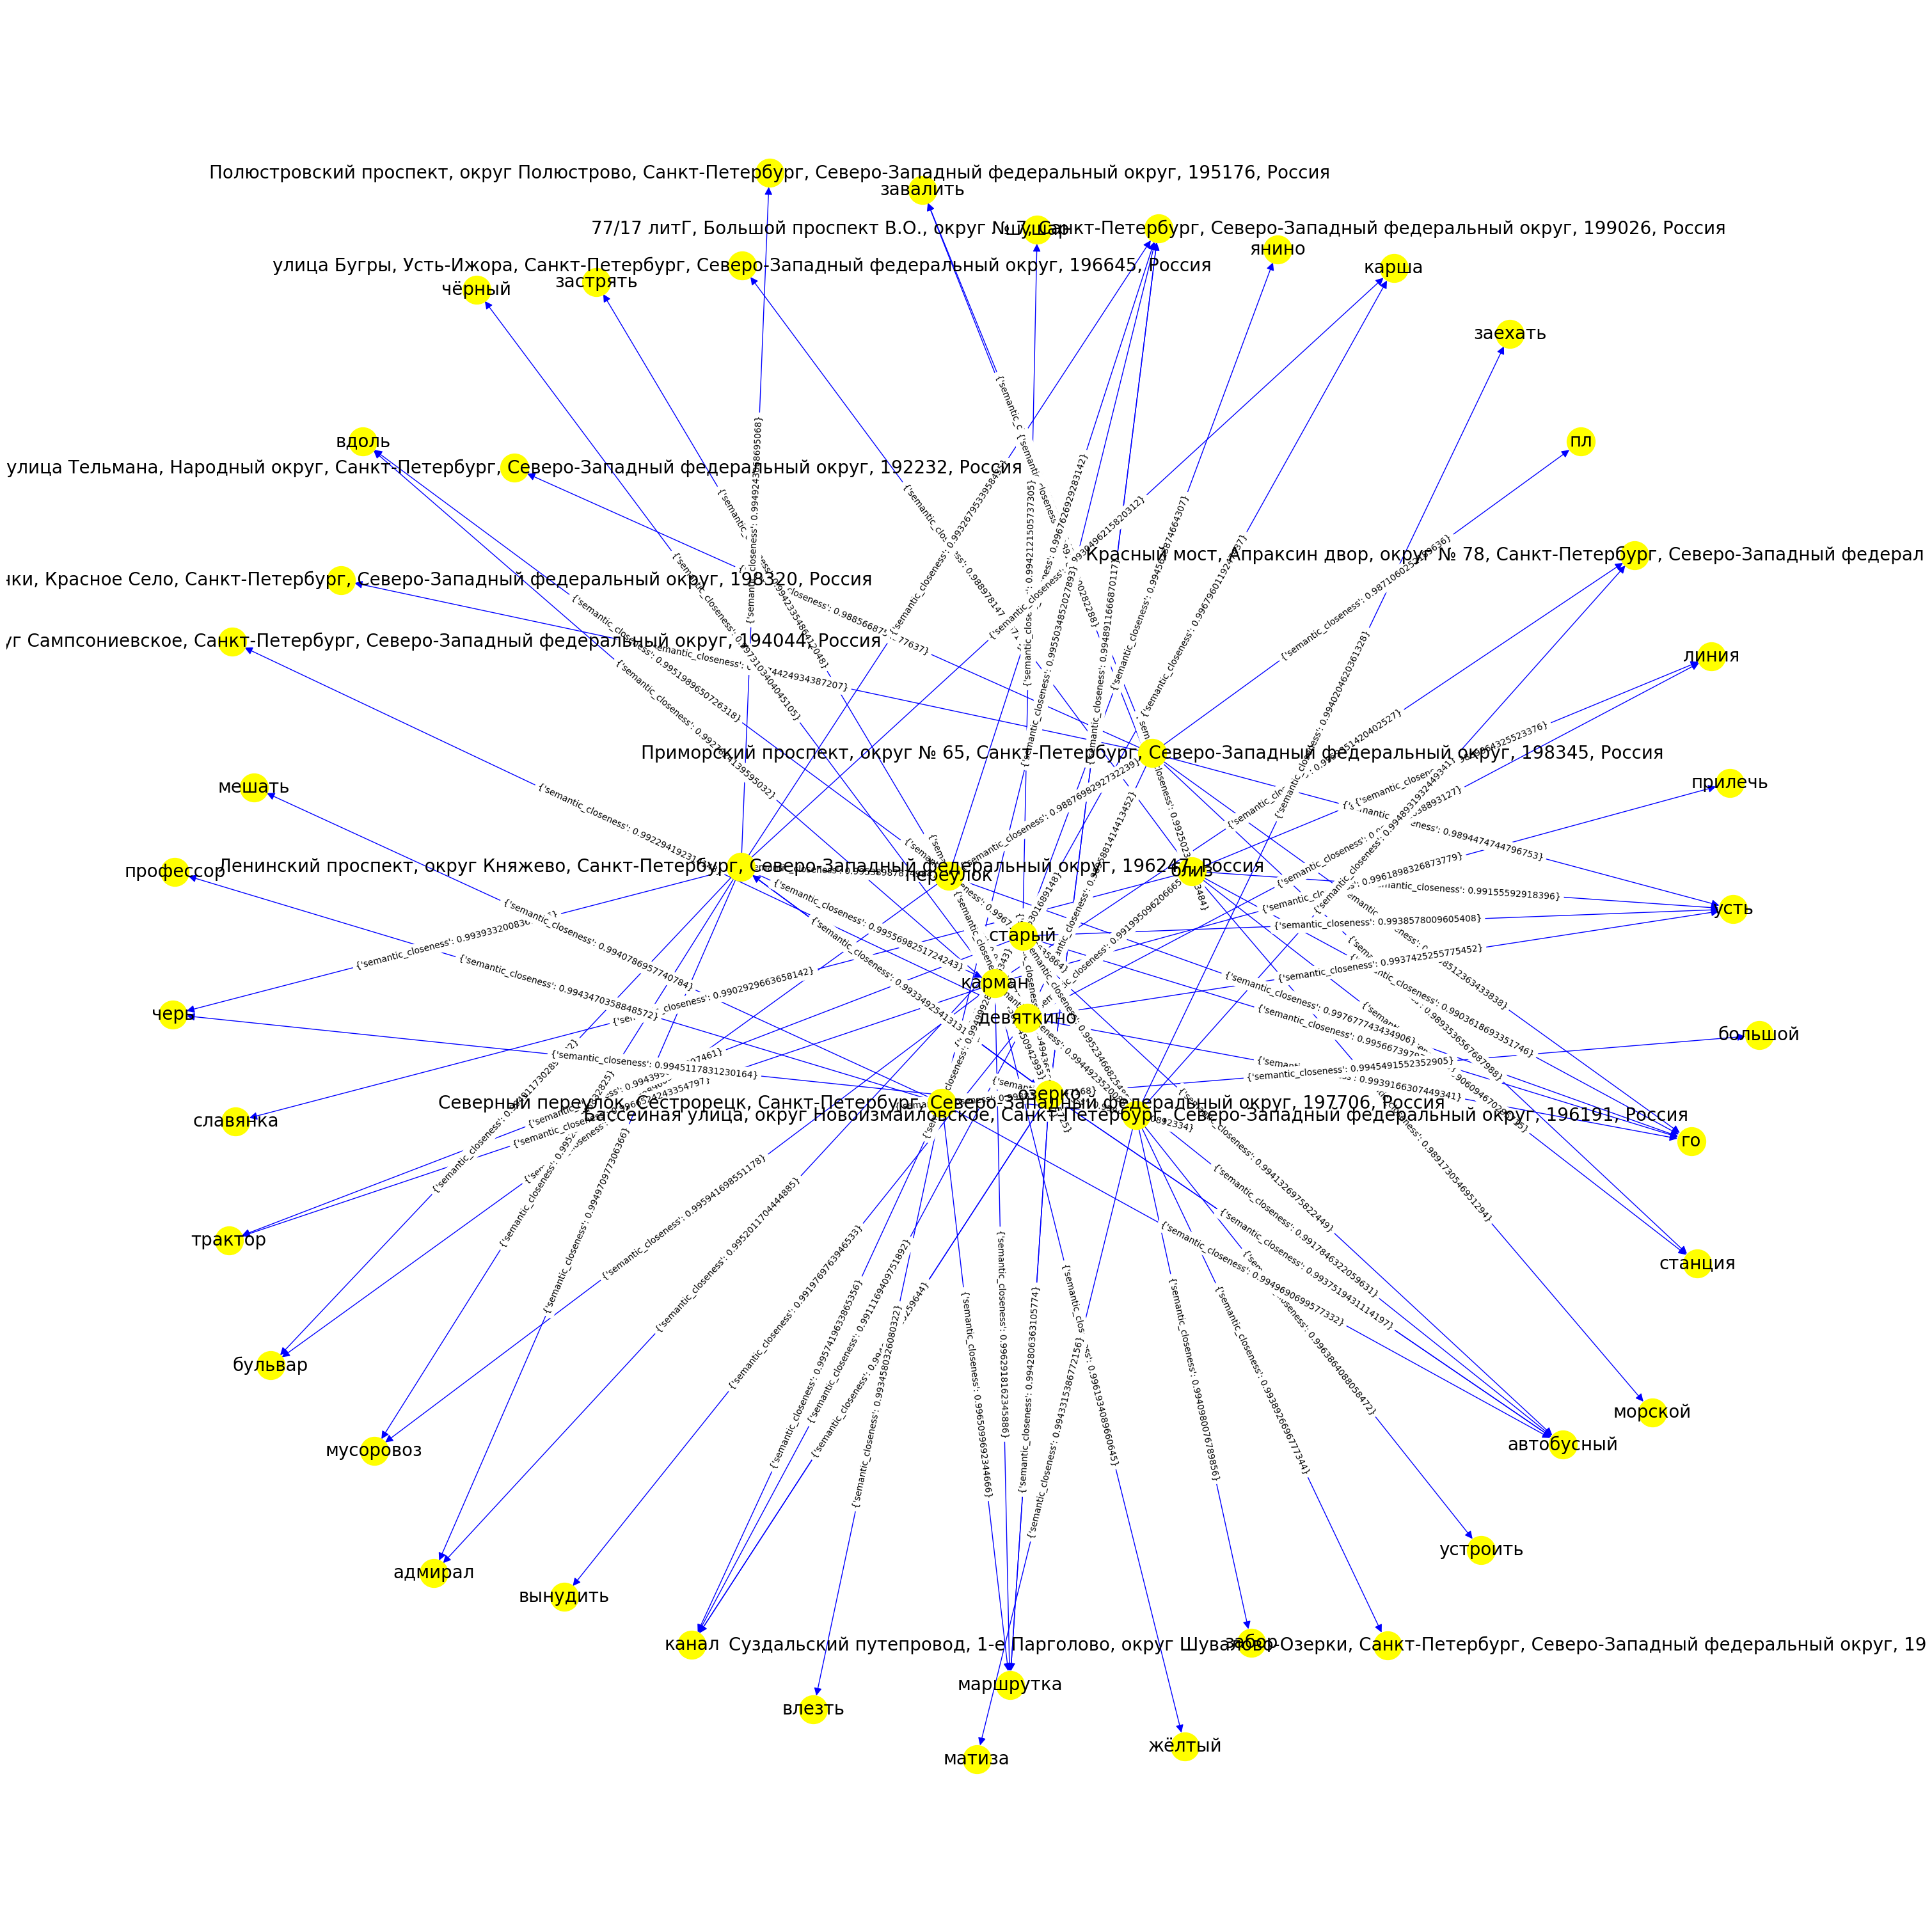

In [33]:
v.save_graph_img('I:\\sloyka\\data\\graph_1.jpg')